# Computational Social Science Project #3 

**Enter your Name:** Yue Lin

*Semester:* Fall 2023

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
import xgboost as xgb
from sklearn.metrics import confusion_matrix

In [56]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [49]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [52]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [25]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [28]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

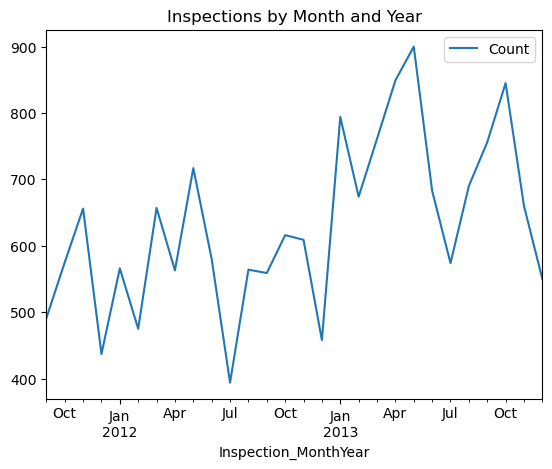

In [29]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

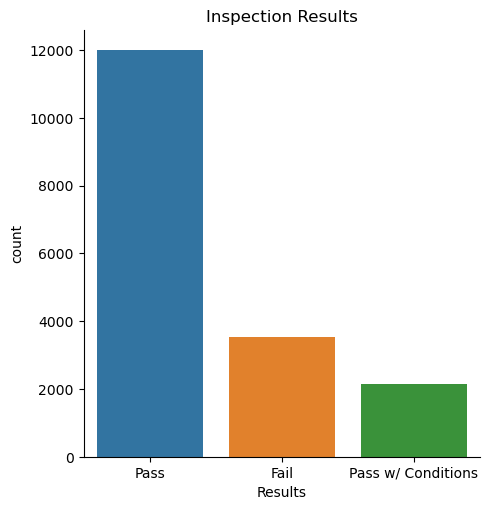

In [30]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

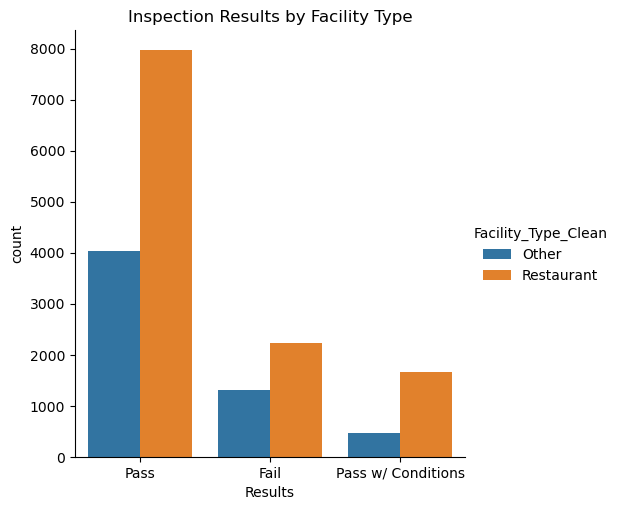

In [31]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [32]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [33]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']
y

Inspection_ID  DBA_Name                                
269961         SEVEN STAR                                                Pass
507211         PANERA BREAD                                              Pass
507212         LITTLE QUIAPO RESTAURANT                                  Fail
507216         SERGIO'S TAQUERIA PIZZA INC.                              Pass
507219         TARGET STORE # T-2079                                     Fail
                                                                  ...        
1393258        CIAO BELLA CAFE                                           Pass
1395218        Christian Fields Style  Bar                               Pass
1395224        W CHICAGO - LAKESHORE                       Pass w/ Conditions
1441493        ADVOCATE ILLINOIS MASONIC MEDICAL CENTER                  Pass
1493801        SODEXHO                                                   Pass
Name: Results, Length: 15311, dtype: object

In [34]:
# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION',
                                                     'WARD_PRECINCT'])

# get dummies
X = pd.get_dummies(X)

In [46]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,0,0,1,1,1,0,0,0,0,1
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,1,0,0,1,0,1,0,0,0,1
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,1,0,0,1,0,1,0,0,0,1
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,1,0,0,1,0,1,0,0,0,1
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,0,1,0,1,0,1,0,0,0,1


In [47]:
X.columns

Index(['criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'POLICE_DISTRICT', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound',
       'Risk_Risk 1 (High)', 'Risk_Risk 2 (Medium)', 'Risk_Risk 3 (Low)',
       'Inspection_Type_Canvass', 'Facility_Type_Clean_Other',
       'Facility_Type_Clean_Restaurant', 'APPLICATION_TYPE_C_EXPA',
       'APPLICATION_TYPE_C_LOC', 'APPLICATION_TYPE_ISSUE',
       'APPLICATION_TYPE_RENEW'],
      dtype='object')

## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

### Model 1: Random Forests

1. Basic logic and assumptions: random forests use bagging as the ensemble method and decision tree as the individual model. Rather than construct just one tree, a random forest grows many trees, using a subset of features to grow each tree. The trees then make predictions, and the random forest takes a majority vote from the trees to determine the winner.

2. Pros: (1) random forests generally provide high accuracy in classification tasks. The ensemble nature helps to reduce overfitting (i.e., when building each tree, a random subset of features is considered for splitting at each node, and the ensemble will be less likely to overfit to specific features in the training data) and improve generalization. (2) Random Forests can provide estimates of feature importance, helping us identify which features contribute the most to the model's predictions. This can be valuable for feature selection and interpretation.

3. Cons: (1) random forests can be computationally expensive, especially for large datasets. (2) Random Forests may be biased toward the dominant classes. (3) Random Forests can be sensitive to hyperparameters (e.g., the number of trees, the maximum depth of each tree, etc.). Fine-tuning these parameters is essential for optimal performance.

4. Reasons to fit this problem: (1) random forests can capture nonlinear relationships between the features and the outcome. In the context of food inspection, where multiple factors from business information, previous inspection results, and neighborhood information may influence the outcome, random forests' ability to model nonlinear relationships is valuable. (2) Moreover, its feature importance analysis can provide insights into predicting the important factors that contribute to the pass/fail inspection outcomes. (3) Random Forests are able to generalize well to unseen data. This is crucial for a predictive model in a dynamic environment like food inspection, where new businesses and neighborhoods may be added to the dataset.

In [44]:
# initialize a random forest classifier
# ----------
rf_classifier = RandomForestClassifier(
                       # specify parameters
                       n_estimators=100,              # specify the number of trees (100 is default)
                       criterion='gini',              # or you can use 'entropy' for information gain
                       max_depth=1,                   # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             # random seed

In [45]:
# specify the hyperparameters
param_grid = {'max_depth': np.arange(1, 5, 1),
              'criterion': ['gini', 'entropy']}

# execute the grid search
rf_classifier_grid = GridSearchCV(rf_classifier,  # model to be tuned
                              param_grid,         # parameters to be searched as specified above
                              cv=3)               # 3-fold cross-validation to be used during hypertuning

# now fit the tuning on the data
rf_classifier_grid.fit(X, y)

# select the best performing model and predict with that on the data
best_index = np.argmax(rf_classifier_grid.cv_results_["mean_test_score"])   # find the best performing model

In [46]:
print(rf_classifier_grid.cv_results_["params"][best_index])

{'criterion': 'gini', 'max_depth': 4}


In [49]:
# change the random forest classifier to its best model based on grid search results
rf_classifier_best = RandomForestClassifier(
                       # specify parameters
                       n_estimators=100,              # specify the number of trees (100 is default)
                       criterion='gini',              # or you can use 'entropy' for information gain
                       max_depth=4,                   # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             # random seed

###  Model 2: Adaptive Boosting

1. Basic logic and assumptions: adaptive boosting is an ensemble learning method that combines the predictions of multiple weak learners to create a strong learner. During the ensemble's prediction, each weak learner contributes to the final prediction with a weight based on its performance. The weights are determined by how well the learner performs on the training data, with misclassified instances getting higher weights. The final prediction is made by aggregating the weighted votes of all weak learners, and weak learners that perform better contribute more to the final prediction.

2. Pros: (1) adaptive boosting often achieves high accuracy in classification tasks by combining the strengths of multiple weak learners. (2) Adaptive boosting is less prone to overfitting compared to individual weak learners, as it focuses on correcting errors and adapting to the characteristics of the data. (3) The weak learners are trained on the errors, which makes adaptive boosting well suited for making classifications in difficult cases.

3. Cons: (1) adaptive boosting can be computationally intensive, especially when a large number of weak learners is used. (2) Adaptive boosting can be sensitive to noisy data and outliers. Since the algorithm focuses on difficult instances, outliers or mislabeled examples may receive undue emphasis, leading to suboptimal performance. (3) In situations where the weak learners are too complex or the dataset contains noise, adaptive boosting may adapt to the noise, leading to overfitting on the training data.

4. Reasons to fit this problem: (1) if there is an imbalance in the dataset, where the number of businesses passing or failing inspections is not equal, adaptive boosting can handle imbalanced classes effectively. Its iterative nature assigns higher weights to misclassified instances, giving more emphasis to the minority class. (2) Adaptive boosting's sequential learning process focuses on correcting mistakes made by weak learners in previous iterations. This is particularly useful in a scenario where certain businesses may have specific characteristics that make them more challenging to classify correctly.

In [53]:
# initialize an adaptive boosting classifer 
# ----------
ada_classifier = AdaBoostClassifier(n_estimators=100)

In [54]:
# specify the hyperparameters
param_grid = {'n_estimators': np.arange(50, 100, 10)}

# execute the grid search
ada_classifier_grid = GridSearchCV(ada_classifier,  # model to be tuned
                              param_grid,         # parameters to be searched as specified above
                              cv=3)               # 3-fold cross-validation to be used during hypertuning

# now fit the tuning on the data
ada_classifier_grid.fit(X, y)

# select the best performing model and predict with that on the data
best_index = np.argmax(ada_classifier_grid.cv_results_["mean_test_score"])   # find the best performing model

In [55]:
print(ada_classifier_grid.cv_results_["params"][best_index])

{'n_estimators': 60}


In [56]:
# change the random forest classifier to its best model based on grid search results
ada_classifier_best = AdaBoostClassifier(n_estimators=60)

### Model 3: eXtreme Gradient Boosting

1. Basic logic and assumptions: XGBoost also uses sequential weak learners to train the models instead of creating a random forest, where each subsequent model tries to minimize the error of the previous model. It uses Gradient Descent to minimize a loss function and improve fit.

2. Pros: (1) XGBoost has built-in functionality to handle missing values, whereas AdaBoost does not have such a buily-in function - it still requires imputation of missing values. (2) XGBoost is generally faster than traditional Gradient Boosting, as it includes several optimization techniques. (3) XGBoost includes additional regularization techniques, such as L1 and L2 regularization, to prevent overfitting, which is not included in AdaBoost.

3. Cons: (1) XGBoost can be computationally expensive, especially for large datasets or when dealing with a high number of features. Training XGBoost models with a large number of trees and deep trees can be time-consuming. (2) XGBoost requires tuning to achieve optimal performance, which can be time-intensive and requires careful consideration of hyperparameter settings.

4. Reasons to fit this problem: (1) XGBoost's ability to handle missing data is valuable in scenarios where certain information might be unavailable for some businesses. This ensures that the model remains robust even when dealing with incomplete data. (2) This observational dataset in our analysis may contain noise or outliers. XGBoost, with its regularization techniques, can exhibit resilience to noisy data, ensuring that the model focuses on underlying patterns rather than being overly influenced by outliers.

In [79]:
# initialize an XGBoost classifier
# ----------
xgb_classifier = xgb.XGBClassifier()

# specify the hyperparameters
param_grid = {'eta': np.arange(0, 1, .1),
             'max_depth': np.arange(0, 10, 1)
             } #step size shrinkage used in update to prevents overfitting

# execute the grid search
xgb_classifier_grid = GridSearchCV(xgb_classifier,  # model to be tuned
                              param_grid,         # parameters to be searched as specified above
                              cv=3)               # 3-fold cross-validation to be used during hypertuning

# now fit the tuning on the data
xgb_classifier_grid.fit(X, y)

# select the best performing model and predict with that on the data
best_index = np.argmax(xgb_classifier_grid.cv_results_["mean_test_score"])   # find the best performing model

print(xgb_classifier_grid.cv_results_["params"][best_index])

{'eta': 0.1, 'max_depth': 3}


In [3]:
# change the random forest classifier to its best model based on grid search results
xgb_classifier_best = xgb.XGBClassifier(eta=.1, max_depth=3)

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [69]:
# define the scoring metrics
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }

In [71]:
# perform cross-validation for the random forests classifier
rf_cv_results = cross_validate(rf_classifier_best,   # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)

# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = rf_cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

accuracy: 0.924
recall: 0.940
precision: 0.749
f1: 0.834


In [72]:
# perform cross-validation for the AdaBoost classifier
ada_cv_results = cross_validate(ada_classifier_best,   # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)

# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = ada_cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

accuracy: 0.917
recall: 0.822
precision: 0.778
f1: 0.798


In [82]:
# perform cross-validation for the XGBoost classifier
xgb_cv_results = cross_validate(xgb_classifier_best,   # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)

# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = xgb_cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

accuracy: 0.925
recall: 0.905
precision: 0.768
f1: 0.830


Overall, I want to prioritize the XGBoost classifier when conducting predictive auditing in this context. This is because XGBoost performs better on accuracy than other models, in part because it is a combination of the best aspects of each of the other models. 

However, we should also note that XGBoost does not always perform the best. For instance, random forests have a better f1 socre than that of XGBoost, whereas AdaBoost does better in terms of precision than that of XGBoost.

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

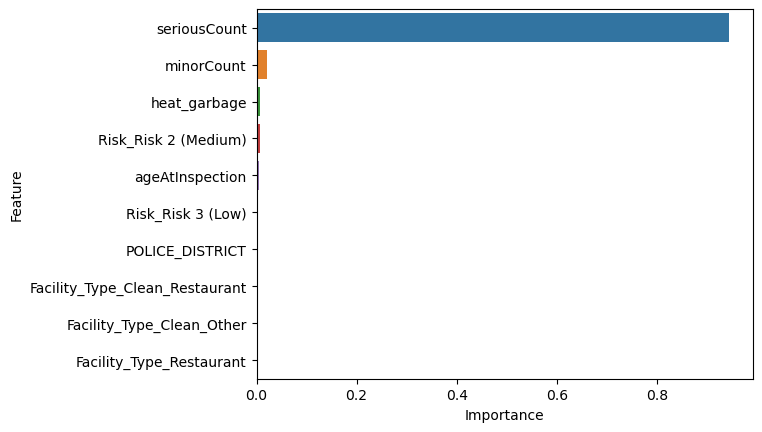

In [73]:
# fit the random forest on data to get feature importance
# ----------
rf_classifier_best.fit(X, y.ravel())

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier_best.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

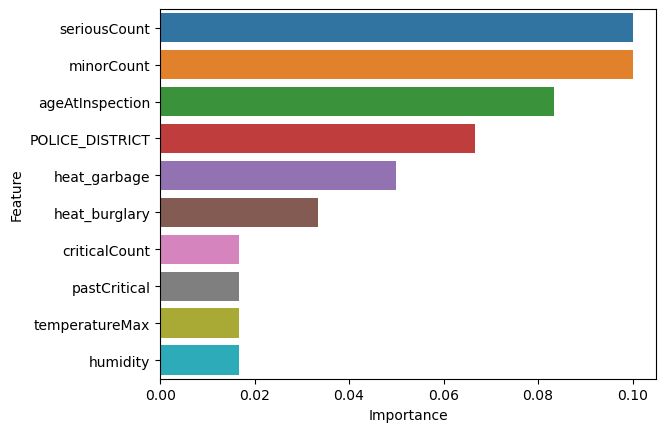

In [84]:
# fit AdaBoost on data to get feature importance
# ----------
ada_classifier_best.fit(X, y.ravel())

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(ada_classifier_best.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

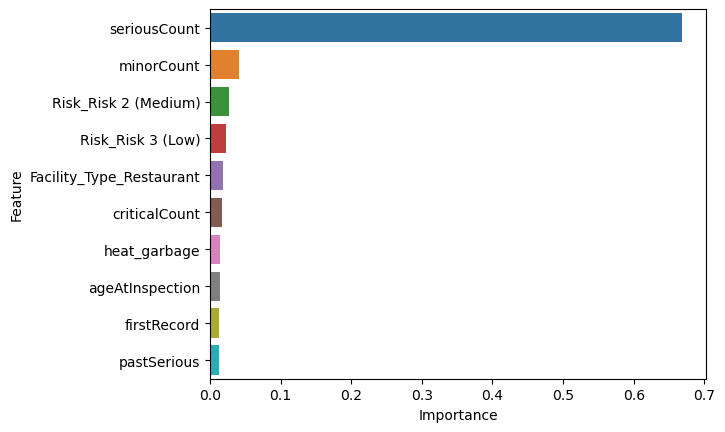

In [85]:
# fit XGBoost on data to get feature importance
# ----------
xgb_classifier_best.fit(X, y.ravel())

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(xgb_classifier_best.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

**Interpretation**: if we use the random forests and the XGBoost classifiers, 'seriousCount' stands out as the most important feature contributing to predicting whether a business passes or fails a food inspection. If we use the adaptive boosting classifier, features like 'seriousCount' 'minorCount' 'ageAtInspection' 'temperatureMax' 'POLICE_DISTRICT' and 'heat_garbage' are important features to predict whether a business passes or fails a food inspection.

Other features I wish I could incorporate in this analysis: information about the training and certification status of employees in food handling and safety practices; information about measures taken to control pests, such as regular inspections, pest control contracts, and the use of traps or deterrents; details about the menu, ingredients used, sourcing of food items, suppliers, and the freshness of ingredients; social media information and online reviews about customers' feedback on food safety.

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [88]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------
# I choose the XGBoost classifier
# predict outcomes
pred = xgb_classifier_best.predict(X)
pred

array([0, 0, 1, ..., 1, 0, 0])

In [133]:
# predict probabilities
probs = xgb_classifier_best.predict_proba(X)[:,1] # failure takes the value of 1, as defined previously
                                                  # the first column (#0) is pass (takes the value of 0), and the second column (#1) is failure (takes the value of 1)
probs

array([0.00240908, 0.00362085, 0.87393534, ..., 0.70123696, 0.00262255,
       0.00280284], dtype=float32)

In [141]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
# merge y and probs
audit_and_pred = np.column_stack((y.ravel(), probs))

# get indices that would sort the array by the second column in descending order
indices = np.argsort(audit_and_pred[:, 1])[::-1]

# use the indices to re-arrange the array
sorted_audit_and_pred = audit_and_pred[indices]
sorted_audit_and_pred

array([[1.00000000e+00, 9.92416263e-01],
       [1.00000000e+00, 9.92296755e-01],
       [1.00000000e+00, 9.91571784e-01],
       ...,
       [0.00000000e+00, 8.57866718e-04],
       [0.00000000e+00, 8.03744653e-04],
       [0.00000000e+00, 7.56965426e-04]])

In [149]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------

df = pd.DataFrame(sorted_audit_and_pred, columns=['y', 'probs'])

# Select the first 1000 rows
selected_rows = df.head(1000)

# Check the distribution of 'y.ravel()' column
value_counts = selected_rows['y'].value_counts()
value_counts

1.0    968
0.0     32
Name: y, dtype: int64

In [161]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------

random_indices = np.random.choice(y.shape[0], size=1000, replace=False)
selected_rows = y[random_indices]

df = pd.DataFrame(selected_rows.ravel(), columns=['y'])

df['y'].value_counts()

0    795
1    205
Name: y, dtype: int64

Overall, by using XGBoost, my predicted algorithm prioritizes finding potential violations by 96.8%, much higher than random auditing (20.5%). This indicates that my predicted algorithm does a better job in finding potential food violations.

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [68]:
chicago_inspections_2014.head()

,,Facility_Type,Risk,Inspection_Type,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_DESCRIPTION,APPLICATION_TYPE,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Results
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
920445,SUBWAY,Restaurant,Risk 1 (High),Canvass,Restaurant,2,0,0,0,0,0,0,0.794521,0,10-38,4.0,Retail Food Establishment,ISSUE,1.432877,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,12.034833,7.194320,1.219222,1,Pass w/ Conditions
920446,SHARKS FISH & CHICKEN,Restaurant,Risk 2 (Medium),Canvass,Restaurant,0,0,6,0,0,0,2,0.660274,0,7-49,4.0,Retail Food Establishment,RENEW,9.931507,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,26.292725,27.837325,12.401466,0,Pass
920448,P K PETRO INC.,Grocery Store,Risk 3 (Low),Canvass,Other,0,1,7,0,0,0,0,2.000000,1,5-21,3.0,Retail Food Establishment,RENEW,11.013699,0,1,0,0,0,0,0,0,0,1,0,0,0.000433,25.30,7.653333,0.636667,49.468944,11.282325,66.467028,0,Fail
920449,"Z T DOLLAR EXCHANGE,INC",Grocery Store,Risk 3 (Low),Canvass,Other,1,2,5,0,0,0,0,2.000000,1,7-40,3.0,Retail Food Establishment,ISSUE,1.408219,0,1,0,0,0,1,0,0,0,0,0,0,0.000433,25.30,7.653333,0.636667,69.939833,26.695701,76.827119,1,Fail
920450,KENNEDY FISH & CHICKEN,Restaurant,Risk 1 (High),Canvass,Restaurant,0,1,7,0,0,0,3,0.964384,0,7-40,3.0,Retail Food Establishment,RENEW,3.304110,0,0,0,0,0,0,0,0,0,0,0,0,0.000433,25.30,7.653333,0.636667,69.662066,27.638311,78.175677,0,Fail


In [62]:
# data processing
# -----------

# drop unnecessary features 
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE'],
                                     inplace = True)

# set index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [63]:
# convert the inspection date to a datetime format
chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'])  
chicago_inspections_2014['Inspection_MonthYear'] = chicago_inspections_2014['Inspection_Date'].dt.to_period('M')
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [64]:
chicago_inspections_2014.columns

Index(['Facility_Type', 'Risk', 'Inspection_Type', 'Facility_Type_Clean',
       'criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'WARD_PRECINCT', 'POLICE_DISTRICT',
       'LICENSE_DESCRIPTION', 'APPLICATION_TYPE', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound', 'Results'],
      dtype='object')

In [65]:
# process target 
y_test2014 = chicago_inspections_2014['Results']

# binarize the outcome variable 
y_test2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_test2014 = lb_style.fit_transform(y_test2014)

# recode 0s and 1s so 1s are "Fail"
y_test2014 = np.where(y_test2014 == 1, 0 ,1)

# process features
X_test2014 = chicago_inspections_2014.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION',
                                                     'WARD_PRECINCT'])

# get dummies
X_test2014 = pd.get_dummies(X_test2014)

X_test2014.columns

Index(['criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'POLICE_DISTRICT', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound',
       'Risk_Risk 1 (High)', 'Risk_Risk 2 (Medium)', 'Risk_Risk 3 (Low)',
       'Inspection_Type_Canvass', 'Facility_Type_Clean_Other',
       'Facility_Type_Clean_Restaurant', 'APPLICATION_TYPE_C_EXPA',
       'APPLICATION_TYPE_C_LOC', 'APPLICATION_TYPE_ISSUE',
       'APPLICATION_TYPE_RENEW'],
      dtype='object')

In [66]:
# predict 
# -----------

xgb_test_model = xgb_classifier_best.fit(X, y.ravel())

# predict on the test data of 2014
y_pred = xgb_test_model.predict(X_test2014)

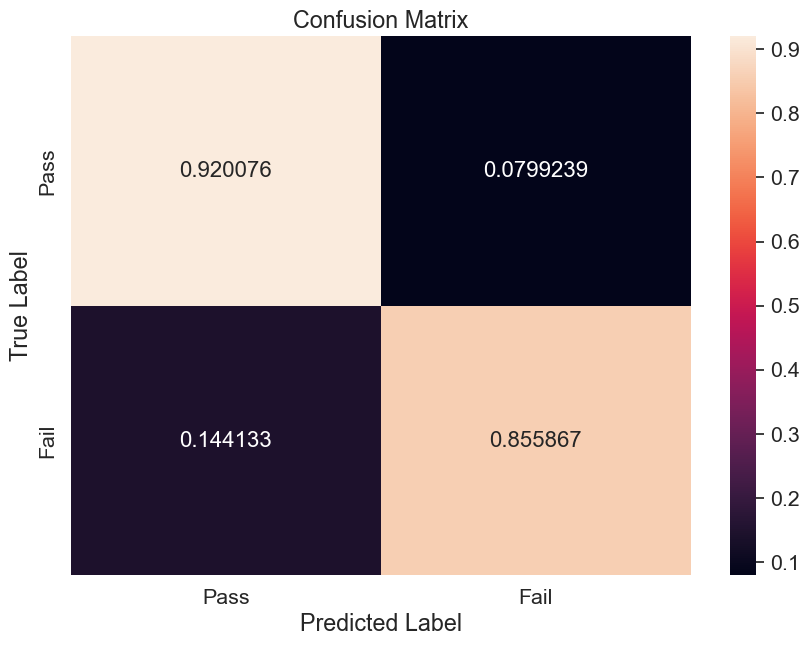

In [67]:
# evaluation: comparing predicted and actual results
# -----------

# create a confusion matrix
cf_matrix = confusion_matrix(y_test2014, 
                             y_pred, 
                             normalize = "true")

# convert to a dataframe
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

# set figure specifications
df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

# plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

I choose XGBoost as my classifier for reasons discussed before (e.g., higher accuracy, etc.) From the confusion matrix, we can see that XGBoost does the best job in predicting businesses passing the food inspection in 2014 (i.e., a 92% success rate of predicting "Passes"). It also performs a good job in predicting businesses failing the food inspection in 2014 (i.e., a 85.6% success rate of predicting "Failures"). Overall, XGBoost is suitable to be adopted in real-world situations to facilitate with food inspection tasks.

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


**ANSWER:** Beyond accuracy, we should also pay attention to other metrics like **precision** (measures how well calibrated predictions are), **recall** (of all of the positive class members in the ground truth labels, how many did we successfully predict as positive?), and **F1 Score** (measures the precision-recall tradeoff). 

I provide two examples to illustrate why other metrics are also crucial. First, in real-world implications, false negatives (i.e., missing a relevant event) might have more severe consequences than false positives. For example, in criminal justice, misclassifying an innocent person as guilty (false positive) can have serious implications. Metrics like precision and recall provide a nuanced view of these trade-offs. 

Second, the F1 score strikes a balance between precision and recall, providing a single metric that considers both aspects. This is particularly useful when a balanced approach to false positives and false negatives is desired. For instance, the F1 score becomes particularly useful in the context of government support programs in unemployment. On false positives: misclassifying an employed individual as at risk of unemployment may result in the misallocation of resources and support programs. Meanwhile, on false negatives: failing to identify an unemployed individual means missing an opportunity for targeted intervention and support, impacting social welfare. Hence, we should pay attention to different metrics, such as the F1 score, rather than merely accuracy, to assess the best algorithm to be implemented in social policies.

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**ANSWER:** First, policymakers can implement a system for continuous monitoring and updating of the algorithm. Regularly updating the algorithm helps it adapt to changes in behavior and maintain its effectiveness. Second, policymakers may also regularly incorporate new relevant features into the model to capture emerging patterns. For instance, a feature could be information on establishments who have adjusted behavior to avoid detection. Third, policymakers may introduce random auditing in addition to the algorithm. This prevents establishments from gaming the system effectively. Randomized auditing can keep establishments on their toes and deter strategic adaptations. Fourth, policymakers can promote transparency in how the algorithm works. This is because clear explanations of the factors considered in the decision-making process may discourage establishments from engaging in futile efforts to manipulate specific features.